**Homework 4 Spring 202**

**Due Date** - **11/23/2022**

Your Name: Liwen Zhu

Your UNI: lz2512 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# PART 2 CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [2]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

2022-11-23 10:21:59.378129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

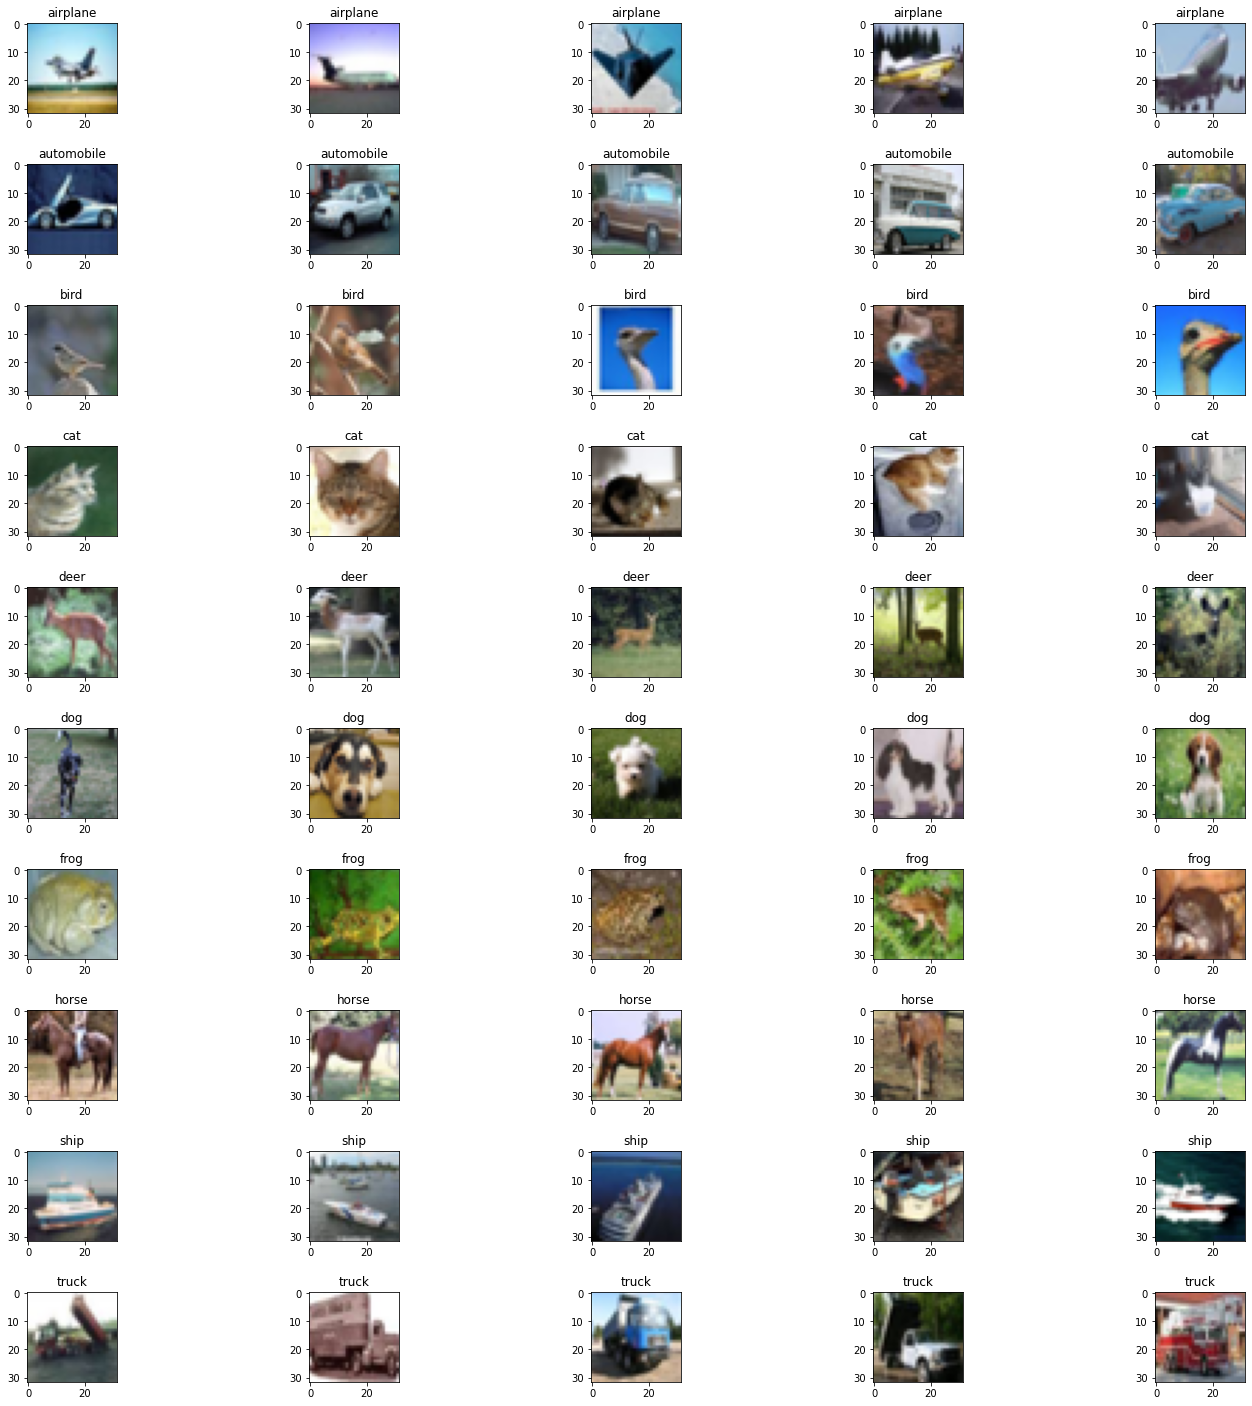

In [4]:
#Your code here
import random
fig,axs = plt.subplots(10,5,figsize=(20,20))
fig.tight_layout(pad=3)
for i in range(10):
    target_list = np.where(y_dev==i)[0]
    index = random.choices(list(target_list),k=5)
    x_dev_list = x_dev[index]
    
    for j in range(5):
        image = x_dev_list[j]
        axs[i,j].imshow(image)
        axs[i,j].set_title(LABELS[i])

2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [5]:
#Your code here
print(f"The shape of x_dev is {x_dev.shape}")
print(f"The shape of y_dev is {y_dev.shape}")
print(f"The shape of x_test is {x_test.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of x_dev is (50000, 32, 32, 3)
The shape of y_dev is (50000, 1)
The shape of x_test is (10000, 32, 32, 3)
The shape of y_test is (10000, 1)


In [6]:
x_dev_rs = x_dev.reshape(x_dev.shape[0],32*32*3)
x_test_rs = x_test.reshape(x_test.shape[0],32*32*3)
print(f"The shape of x_dev is {x_dev_rs.shape}")
print(f"The shape of x_test is {x_test_rs.shape}")

The shape of x_dev is (50000, 3072)
The shape of x_test is (10000, 3072)


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_dev_std = ss.fit_transform(x_dev_rs)
x_test_std = ss.fit_transform(x_test_rs)

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
y_dev_tc = to_categorical(y_dev,10)
y_test_tc = to_categorical(y_test,10)
x_train, x_val, y_train, y_val = train_test_split(x_dev_std,y_dev_tc,test_size=0.2)

2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [9]:
#Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential([
    Dense(128, input_shape=(3072,)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

2022-11-23 10:22:35.495472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [10]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trai

2.5) Do you think this number is dependent on the image height and width? 

In [11]:
# Your text here
print("No, I think the number of parameters depends on the number of neurons at current and previous layers.")

No, I think the number of parameters depends on the number of neurons at current and previous layers.


**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [12]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train[0].reshape(1,-1))

# print(output)
print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 0s 286ms/step
Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs with batch size 128.

In [13]:
#Your code here
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_callback = model.fit(x_dev_std,y_dev_tc,batch_size=128,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.7644 - accuracy: 0.3898 - val_loss: 1.5529 - val_accuracy: 0.4553
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 1.5158 - accuracy: 0.4703 - val_loss: 1.4228 - val_accuracy: 0.5066
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.4148 - accuracy: 0.5028 - val_loss: 1.3082 - val_accuracy: 0.5472
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 1.3359 - accuracy: 0.5318 - val_loss: 1.2516 - val_accuracy: 0.5699
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 1.2770 - accuracy: 0.5544 - val_loss: 1.2103 - val_accuracy: 0.5728
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.2247 - accuracy: 0.5690 - val_loss: 1.1384 - val_accuracy: 0.6000
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.1818 - accuracy: 0.5825 - val_loss: 1.1302 - val_accuracy: 0.6050
Epoch 

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

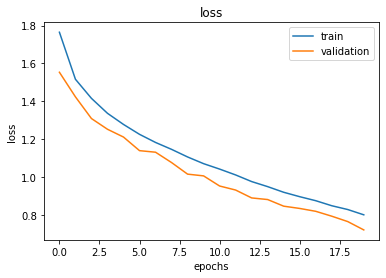

In [14]:
#Your code here
import pandas as pd
hist=pd.DataFrame(history_callback.history)
plt.plot(hist.index,hist["loss"])
plt.plot(hist.index,hist["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

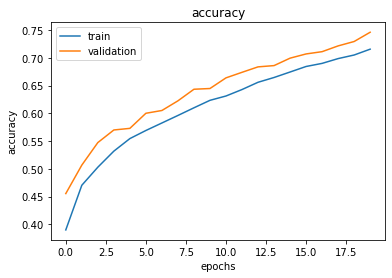

In [15]:
plt.plot(hist.index,hist["accuracy"])
plt.plot(hist.index,hist["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

2.8) Finally, report the metric chosen on test set.

In [16]:
#Your code here
score = model.evaluate(x_test_std,y_test_tc,verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

Test loss: 1.690
Test accuracy: 0.507


2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy [Open ended question, you may try different approaches]

In [17]:
#Your code here
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
print("I will apply dropout and batch normalization to improve the accuracy")
model_dbn = Sequential()
model_dbn.add(Input(shape=(3072,)))
model_dbn.add(BatchNormalization())
model_dbn.add(Dense(128,activation="relu"))
model_dbn.add(Dropout(0.5))
model_dbn.add(BatchNormalization())
model_dbn.add(Dense(64,activation="relu"))
model_dbn.add(Dropout(0.5))
model_dbn.add(Dense(10,activation="softmax"))

I will apply dropout and batch normalization to improve the accuracy


In [18]:
model_dbn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_callback_dropout = model_dbn.fit(x_dev_std,y_dev_tc,batch_size=128,epochs=20,verbose=1,validation_data=(x_val,y_val))

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 2.1304 - accuracy: 0.2544 - val_loss: 1.7542 - val_accuracy: 0.3898
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.8630 - accuracy: 0.3311 - val_loss: 1.6559 - val_accuracy: 0.4271
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.7784 - accuracy: 0.3639 - val_loss: 1.5956 - val_accuracy: 0.4435
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.7367 - accuracy: 0.3740 - val_loss: 1.5511 - val_accuracy: 0.4573
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.6982 - accuracy: 0.3909 - val_loss: 1.5063 - val_accuracy: 0.4736
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 1.6762 - accuracy: 0.3987 - val_loss: 1.4871 - val_accuracy: 0.4776
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 1.6543 - accuracy: 0.4045 - val_loss: 1.4623 - val_accuracy: 0.4848
Epoch 

In [19]:
score_dbn = model_dbn.evaluate(x_test_std,y_test_tc,verbose=0)
print("Test loss: {:.3f}".format(score_dbn[0]))
print("Test accuracy: {:.3f}".format(score_dbn[1]))

Test loss: 1.407
Test accuracy: 0.502


2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

In [20]:
y_pred = model_dbn.predict(x_test_std[:50])
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

2/2 [==============================] - 0s 2ms/step


array([3, 9, 8, 0, 6, 6, 3, 6, 5, 1, 8, 9, 6, 7, 9, 8, 5, 3, 8, 6, 7, 0,
       0, 9, 4, 6, 6, 7, 9, 6, 6, 2, 4, 3, 9, 1, 7, 9, 1, 8, 0, 6, 3, 6,
       0, 9, 3, 9, 4, 4])

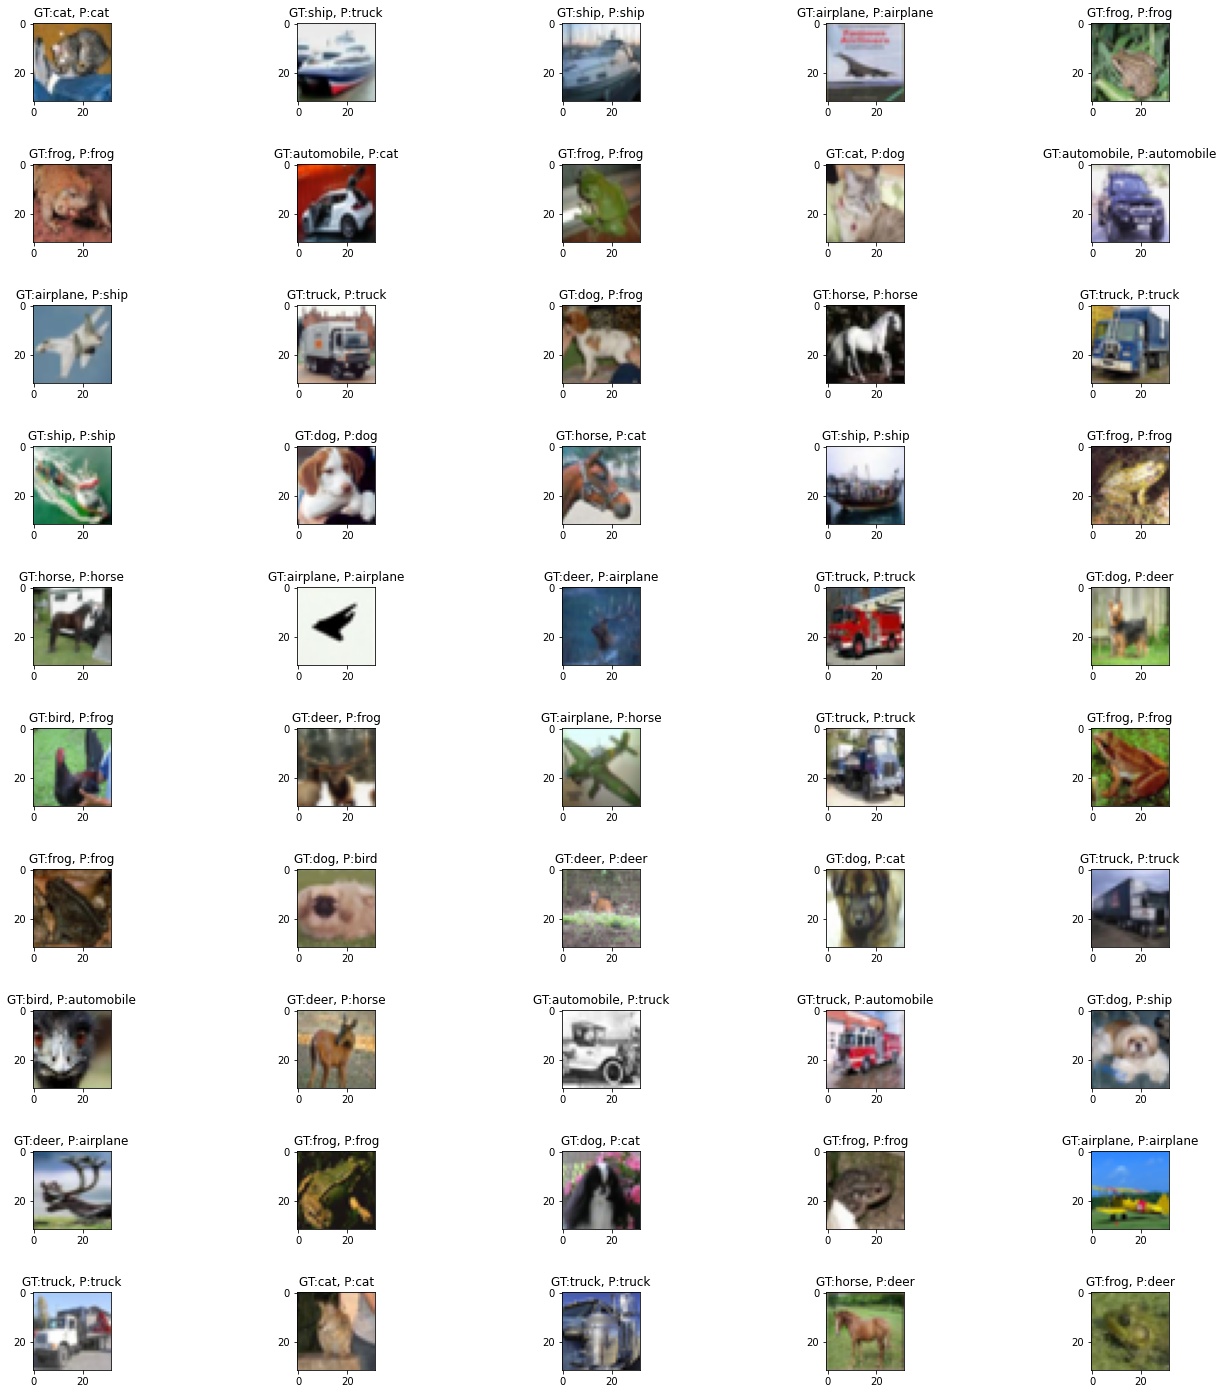

In [21]:
#Your code here
fig = plt.figure(figsize=(20,20))

for i in range(50):
    fig.tight_layout(pad=3)
    fig.add_subplot(10,5,i+1).set_title(f"GT:{LABELS[y_test[i][0]]}, P:{LABELS[y_pred_class[i]]}")
    plt.imshow(x_test[i])

# PART 3 Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [22]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4 )Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)


In [23]:
# your code here
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
cnn = Sequential()

cnn.add(Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(32,32,3),padding='same',strides=1))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,kernel_size=(5,5),activation='relu',padding="valid"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

3.2 Report the model summary 

In [24]:
#your code here
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)              

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [25]:
# Your code here
cnn.compile("adam","categorical_crossentropy",metrics=['accuracy'])
history_cnn = cnn.fit(x_dev,to_categorical(y_dev,10),batch_size=128,epochs=20,validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 17s 46ms/step - loss: 1.6943 - accuracy: 0.3780 - val_loss: 1.4611 - val_accuracy: 0.4636
Epoch 2/20
352/352 [==============================] - 16s 47ms/step - loss: 1.4030 - accuracy: 0.4930 - val_loss: 1.3153 - val_accuracy: 0.5274
Epoch 3/20
352/352 [==============================] - 17s 47ms/step - loss: 1.2969 - accuracy: 0.5346 - val_loss: 1.2842 - val_accuracy: 0.5376
Epoch 4/20
352/352 [==============================] - 16s 46ms/step - loss: 1.2166 - accuracy: 0.5680 - val_loss: 1.1798 - val_accuracy: 0.5816
Epoch 5/20
352/352 [==============================] - 17s 48ms/step - loss: 1.1486 - accuracy: 0.5928 - val_loss: 1.1199 - val_accuracy: 0.6060
Epoch 6/20
352/352 [==============================] - 16s 47ms/step - loss: 1.0941 - accuracy: 0.6101 - val_loss: 1.0833 - val_accuracy: 0.6230
Epoch 7/20
352/352 [==============================] - 16s 46ms/step - loss: 1.0473 - accuracy: 0.6275 - val_loss: 1.0762 - val_accuracy:

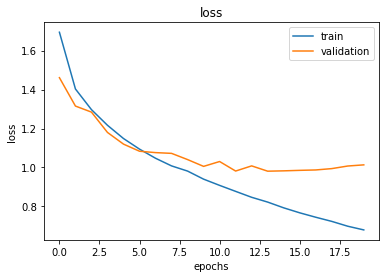

In [26]:
hist_cnn=pd.DataFrame(history_cnn.history)
plt.plot(hist_cnn.index,hist_cnn["loss"])
plt.plot(hist_cnn.index,hist_cnn["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

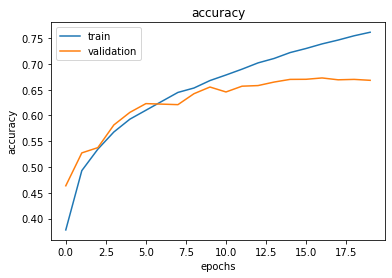

In [27]:
plt.plot(hist_cnn.index,hist_cnn["accuracy"])
plt.plot(hist_cnn.index,hist_cnn["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

In [28]:
score_cnn = cnn.evaluate(x_test,to_categorical(y_test,10),verbose=0)
print("Test loss: {:.3f}".format(score_cnn[0]))
print("Test accuracy: {:.3f}".format(score_cnn[1]))

Test loss: 1.089
Test accuracy: 0.643


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [29]:
# Your code here
cnn_drop = Sequential()

cnn_drop.add(Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(32,32,3),padding='same',strides=1))
cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
cnn_drop.add(Dropout(0.3))
cnn_drop.add(Conv2D(16,kernel_size=(5,5),activation='relu',padding="valid"))
cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
cnn_drop.add(Dropout(0.3))
cnn_drop.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
cnn_drop.add(Flatten())
cnn_drop.add(Dense(84,activation='relu'))
cnn_drop.add(Dense(10,activation='softmax'))

In [30]:
cnn_drop.compile("adam","categorical_crossentropy",metrics=['accuracy'])
history_cnndp = cnn_drop.fit(x_dev,to_categorical(y_dev,10),batch_size=128,epochs=20,validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 18s 51ms/step - loss: 1.8210 - accuracy: 0.3305 - val_loss: 1.5589 - val_accuracy: 0.4398
Epoch 2/20
352/352 [==============================] - 17s 49ms/step - loss: 1.5460 - accuracy: 0.4348 - val_loss: 1.4210 - val_accuracy: 0.4846
Epoch 3/20
352/352 [==============================] - 17s 49ms/step - loss: 1.4510 - accuracy: 0.4742 - val_loss: 1.3558 - val_accuracy: 0.5084
Epoch 4/20
352/352 [==============================] - 17s 48ms/step - loss: 1.3890 - accuracy: 0.4978 - val_loss: 1.2811 - val_accuracy: 0.5316
Epoch 5/20
352/352 [==============================] - 17s 49ms/step - loss: 1.3408 - accuracy: 0.5174 - val_loss: 1.2412 - val_accuracy: 0.5608
Epoch 6/20
352/352 [==============================] - 18s 50ms/step - loss: 1.3021 - accuracy: 0.5292 - val_loss: 1.1936 - val_accuracy: 0.5796
Epoch 7/20
352/352 [==============================] - 17s 49ms/step - loss: 1.2575 - accuracy: 0.5507 - val_loss: 1.1830 - val_accuracy:

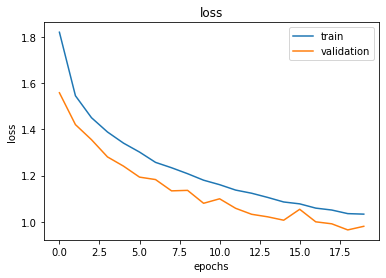

In [31]:
hist_cnndp=pd.DataFrame(history_cnndp.history)
plt.plot(hist_cnndp.index,hist_cnndp["loss"])
plt.plot(hist_cnndp.index,hist_cnndp["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

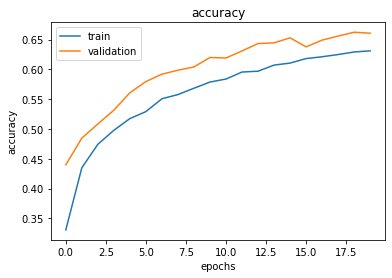

In [32]:
plt.plot(hist_cnndp.index,hist_cnndp["accuracy"])
plt.plot(hist_cnndp.index,hist_cnndp["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

In [33]:
cnn_bn = Sequential()

cnn_bn.add(Conv2D(6,kernel_size=(5,5),activation='relu',input_shape=(32,32,3),padding='same',strides=1))
cnn_bn.add(MaxPooling2D(pool_size=(2,2)))
cnn_bn.add(BatchNormalization())
cnn_bn.add(Conv2D(16,kernel_size=(5,5),activation='relu',padding="valid"))
cnn_bn.add(MaxPooling2D(pool_size=(2,2)))
cnn_bn.add(BatchNormalization())
cnn_bn.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
cnn_bn.add(Flatten())
cnn_bn.add(Dense(84,activation='relu'))
cnn_bn.add(Dense(10,activation='softmax'))

In [34]:
cnn_bn.compile("adam","categorical_crossentropy",metrics=['accuracy'])
history_cnnbn = cnn_bn.fit(x_dev,to_categorical(y_dev,10),batch_size=128,epochs=20,validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 20s 54ms/step - loss: 1.4323 - accuracy: 0.4880 - val_loss: 1.9981 - val_accuracy: 0.3508
Epoch 2/20
352/352 [==============================] - 19s 54ms/step - loss: 1.1182 - accuracy: 0.6018 - val_loss: 1.1208 - val_accuracy: 0.6060
Epoch 3/20
352/352 [==============================] - 19s 54ms/step - loss: 0.9786 - accuracy: 0.6521 - val_loss: 1.1727 - val_accuracy: 0.5894
Epoch 4/20
352/352 [==============================] - 20s 57ms/step - loss: 0.8865 - accuracy: 0.6880 - val_loss: 1.1833 - val_accuracy: 0.5890
Epoch 5/20
352/352 [==============================] - 21s 60ms/step - loss: 0.8071 - accuracy: 0.7155 - val_loss: 1.0771 - val_accuracy: 0.6254
Epoch 6/20
352/352 [==============================] - 19s 53ms/step - loss: 0.7414 - accuracy: 0.7396 - val_loss: 1.1352 - val_accuracy: 0.6098
Epoch 7/20
352/352 [==============================] - 19s 53ms/step - loss: 0.6864 - accuracy: 0.7562 - val_loss: 1.1655 - val_accuracy:

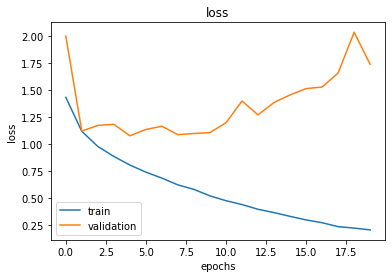

In [35]:
hist_cnnbn=pd.DataFrame(history_cnnbn.history)
plt.plot(hist_cnnbn.index,hist_cnnbn["loss"])
plt.plot(hist_cnnbn.index,hist_cnnbn["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

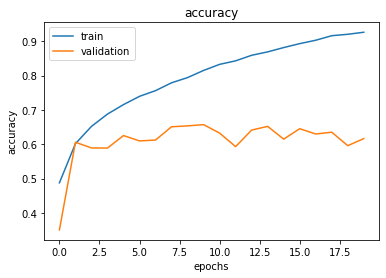

In [36]:
plt.plot(hist_cnnbn.index,hist_cnnbn["accuracy"])
plt.plot(hist_cnnbn.index,hist_cnnbn["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

In [37]:
score_cnndp = cnn_drop.evaluate(x_test,to_categorical(y_test,10),verbose=0)
score_cnnbn = cnn_bn.evaluate(x_test,to_categorical(y_test,10),verbose=0)
print(f"The loss and accuracy with dropout are {score_cnndp[0]} and {score_cnndp[1]}.")
print(f"The loss and accuracy with batch normalization are {score_cnnbn[0]} and {score_cnnbn[1]}.")
print("Dropout helps with overfitting better.")

The loss and accuracy with dropout are 1.0076313018798828 and 0.6486999988555908.
The loss and accuracy with batch normalization are 1.7768703699111938 and 0.6223999857902527.
Dropout helps with overfitting better.
